# RF, CNN and LSTM Models
### Without Stemming

## Importação das Bibliotecas Necessárias

In [1]:
#!pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
SEED = 1275

## Importação e Pré-processamento do Dataset

In [4]:
# Importa o dataset
primary_address = '\\Users\dsm3\OneDrive - UFPE\Documentos\Data Science\Residência CIN (2021)\Disciplinas\TCC\TCC - Datasets\\tweets-rotulados\\'
secondary_address = 'tweets-220826-220707-294638-24860_labeled-zeta-3.csv'

PATH = primary_address + secondary_address

df = pd.read_csv(PATH, 
                 usecols=['id', 'date', 'tweet', 'tweet_clean', 'emojis', 'label', 'file'], 
                 infer_datetime_format=True, 
                 parse_dates=[1]
                )

In [7]:
# Imprime 5 amostras do dataset
df.head(5)

,id,date,tweet,tweet_clean,emojis,file,label
0,1547663241857249284,2022-07-14 19:24:05+00:00,Pq o Bozo vem cagando na piscina desde o iníci...,Pq o Bozo vem cagando na piscina desde o iníci...,no emojis,bolsonaro-220714-220707-3788.csv,NaN
1,1547662636052992003,2022-07-14 19:21:41+00:00,Tem dois bolsominion falando uma caralhada de ...,Tem dois bolsominion falando uma caralhada de ...,no emojis,bolsonaro-220714-220707-3788.csv,NaN
2,1547662207185326080,2022-07-14 19:19:59+00:00,Cada vez mais eu amo a Anitta por incomodar ta...,Cada vez mais eu amo a Anitta por incomodar ta...,no emojis,bolsonaro-220714-220707-3788.csv,NaN
3,1547661893883416577,2022-07-14 19:18:44+00:00,"Sem dúvida, o bolsonarista tem tudo em comum c...","Sem dúvida, o bolsonarista tem tudo em comum c...",no emojis,bolsonaro-220714-220707-3788.csv,NaN
4,1547661784022016001,2022-07-14 19:18:18+00:00,jair bolsonaro eu so quero a tua rola encaixaa...,jair bolsonaro eu so quero a tua rola encaixaa...,no emojis,bolsonaro-220714-220707-3788.csv,NaN


In [8]:
# Imprime formato do dataset

print('Shape do dataset:', df.shape)

Shape do dataset: (294638, 7)


In [9]:
# Informações sobre as variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294638 entries, 0 to 294637
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   id           294638 non-null  int64              
 1   date         294638 non-null  datetime64[ns, UTC]
 2   tweet        294638 non-null  object             
 3   tweet_clean  294638 non-null  object             
 4   emojis       294638 non-null  object             
 5   file         294638 non-null  object             
 6   label        24860 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 15.7+ MB


In [10]:
# Null data check
(df.isna().sum()/df.shape[0])*100

id              0.000000
date            0.000000
tweet           0.000000
tweet_clean     0.000000
emojis          0.000000
file            0.000000
label          91.562528
dtype: float64

### Criando um dataframe contendo apenas tweets rotulados

In [11]:
from sklearn.utils import shuffle

In [12]:
# Filtrando apenas os dados rotulados
df_tweets = df[~df['label'].isna()].copy()
df_tweets = shuffle(df_tweets, random_state=SEED)
df_tweets.reset_index(drop=False, inplace=True)

In [13]:
# Redefine os tipos dos dados

df_tweets['label'] = df_tweets['label'].astype('int8')

In [14]:
df_tweets.head()

,index,id,date,tweet,tweet_clean,emojis,file,label
0,5918,1549043532777656320,2022-07-18 14:48:52+00:00,Tô tentando arrumar uns votos pra Bolsonaro ma...,Tô tentando arrumar uns votos pra Bolsonaro ma...,😁😄,bolsonaro-220722-220715-4079.csv,1
1,64112,1546941218097168385,2022-07-12 19:35:01+00:00,"Vou contar uma coisa que a maioria não sabe, v...","Vou contar uma coisa que a maioria não sabe, v...",🙊,lula-220714-220707-22495.csv,1
2,88643,1549387378640420864,2022-07-19 13:35:11+00:00,"Quem for votar no Lula me segue, quem for vota...","Quem for votar no Lula me segue, quem for vota...",🏠,lula-220722-220715-24295.csv,1
3,234637,1562967486458302464,2022-08-26 00:57:41+00:00,“Nem lula nem Bolsonaro …” evidentemente essa ...,“Nem lula nem Bolsonaro …” evidentemente essa ...,🤢,lula-220826-220825-84492-(entrevista_JN).csv,-1
4,95019,1548679531061460994,2022-07-17 14:42:27+00:00,Ele reclamou do preço da gasolina e o assunto ...,Ele reclamou do preço da gasolina e o assunto ...,⬇,lula-220722-220715-24295.csv,0


In [15]:
df_tweets.tail()

,index,id,date,tweet,tweet_clean,emojis,file,label
24855,132429,1554283848464318468,2022-08-02 01:52:01+00:00,Bosonaro valeu pelo os a 600$ mais eu vou vota...,Bosonaro valeu pelo os a 600$ mais eu vou vota...,😘🤑🚩🤣,lula-220804-220728-26269.csv,1
24856,267889,1562955754545459200,2022-08-26 00:11:04+00:00,"Acho que o Bonner tá ficando meio puto, porque...","Acho que o Bonner tá ficando meio puto, porque...",❤,lula-220826-220825-84492-(entrevista_JN).csv,1
24857,11563,1553611023168462849,2022-07-31 05:18:27+00:00,🚨🚨🇧🇷🇧🇷 Por tudo publicado por mim aqui no Twit...,🇧🇷🇧🇷 Por tudo publicado por mim aqui no Twitte...,🚨,bolsonaro-220804-220728-2500.csv,0
24858,116609,1551337701701570560,2022-07-24 22:45:05+00:00,O #capitaodopovo na verdade é o CHARLATÃO DO P...,O #capitaodopovo na verdade é o CHARLATÃO DO P...,✊🏽,lula-220728-220721-23134.csv,1
24859,64874,1546872037129551873,2022-07-12 15:00:07+00:00,Vinicius qr q eu vá vê a posse do lula cm ele ...,Vinicius qr q eu vá vê a posse do lula cm ele ...,😪,lula-220714-220707-22495.csv,0


In [16]:
# Avaliação de alguns registros
twt = 155
print(df_tweets.at[twt, 'tweet'])
print(df_tweets.at[twt, 'label'])

Meu pai riu do q o bolsonaro falou q um jeito irônico acho q dps dessa merda ele sai desse mundo bolsonarista🙌
1


In [17]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24860 entries, 0 to 24859
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   index        24860 non-null  int64              
 1   id           24860 non-null  int64              
 2   date         24860 non-null  datetime64[ns, UTC]
 3   tweet        24860 non-null  object             
 4   tweet_clean  24860 non-null  object             
 5   emojis       24860 non-null  object             
 6   file         24860 non-null  object             
 7   label        24860 non-null  int8               
dtypes: datetime64[ns, UTC](1), int64(2), int8(1), object(4)
memory usage: 1.4+ MB


In [18]:
# Intervalo de datas no qual foram capturadas os tweets

print('Período dos tweets: ', df_tweets['date'].min().strftime('%Y-%m-%d'), 'a',\
      df_tweets['date'].max().strftime('%Y-%m-%d'))

Período dos tweets:  2022-07-07 a 2022-08-26


In [19]:
# Verificação do balaceamento das classes - coluna 'label'

per_var = pd.DataFrame()
per_var['count'] = df_tweets['label'].value_counts()
per_var['%'] = per_var['count']/len(df_tweets['label'])*100
per_var

,count,%
1,11743,47.236525
0,11330,45.575221
-1,1787,7.188254


# Etapa 2: Processamento dos Dados Textuais

## Importação das Bibliotecas Necessárias

In [22]:
from collections import Counter
import re
import string
import nltk
#import spacy as sp
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()

nltk.download('stopwords')
nltk.download('punkt') # A data model created by Jan Strunk that NLTK uses to split full texts into word lists

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsm3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dsm3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenização das Sentenças

In [23]:
# !pip install gensim==4.1.2

In [24]:
import gensim
import gensim.downloader
gensim.__version__

'4.1.2'

In [25]:
from gensim.models import Word2Vec # KeyedVectors

### Sem Stemming

In [26]:
# Tokenização
def tokenizer(tweets_clean):
    sentences_set_twt = []
    sentence = []
    dict_pt = {}
    punct_set = ['..', '...', "''", "'''", '``', '```', '*', '**', '***', '…', '^', '^^', '-']
    stop_words = set(stopwords.words('portuguese'))
    odd_symbols = '0️⃣1️⃣2️⃣3️⃣4️⃣5️⃣6️⃣7️⃣8️⃣9️⃣✓★✩–⁰♡₱₵₵¿£¢¡´◕‿◕☆●•↓🇻🇳-º°ª1⃣2⃣3⃣🇧🇷🇦🇴🇨🇺🇩🇪🇪🇸🇫🇫🇭🇰🇮🇱🇮🇱🇺🇦🇮🇱🇺🇸🇮🇹🇮🇹🇯🇵🇯🇵🇺🇦🇺🇲🇺🇲🇮🇱🇺🇸🇺🇸🇮🇱🇸🇺🇸'

    for item in tweets_clean:
      words = word_tokenize(item, language='portuguese')
    
      rmv_hashtags = []

      for index,w in enumerate(words):    # Removendo as hashtags
        if (w == '#') and (index < (len(words) - 1)):
            rmv_hashtags.append(words[index + 1])
      if len(rmv_hashtags) > 0:
        for hashtag in rmv_hashtags:
            words.remove(hashtag)  
      
      for token in words:
        token = token.lower()                                        # Todas as palavras em minúsculo
        token = re.sub('\u200d', '', token, 20)                      # Remove todas as ocorrências de '\u200d' das strings
        token = token.translate(str.maketrans('', '', odd_symbols))  # Remove símbolos "estranhos"
        token = token.translate(str.maketrans('', '', string.punctuation)) # Remove pontuação das strings

        if (len(token) > 1) and (token not in punct_set) and (token not in stop_words) and not token.isdigit(): # Verifica se não é pontuação ou 'stop word'
            #token = stemmer.stem(token)
            sentence.append(token)
                    
      if len(sentence) >= 3:     # Limitando o comprimento mínimo das sentenças para 3          
          sentences_set_twt.append(sentence)

          word_freq = Counter(sentence)

          for word,freq in word_freq.items():
            if word in dict_pt.keys():
              dict_pt[word] = dict_pt[word] + freq
            else:
              dict_pt[word] = freq
      sentence = []

    sentences_set = np.asarray(sentences_set_twt, dtype='object')

    print('Nº de sentenças:', len(sentences_set))
    print("Tamanho do vocabulário: ", len(dict_pt))
    print("Vocabulário:\n", sorted(dict_pt.keys()))
    
    return sentences_set, dict_pt

In [27]:
sentences_set_full, dict_pt_full = tokenizer(df['tweet_clean'])

Nº de sentenças: 290455
Tamanho do vocabulário:  146784
Vocabulário:
 ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaavouperder', 'aaaaaa

In [28]:
# 10 palavras mais frequentes
dict_pt_df = pd.DataFrame(sorted(list(dict_pt_full.items()), key=lambda v: v[1], reverse=True), columns=['words', 'freq'])
dict_pt_df.head(10)

,words,freq
0,lula,252099
1,bolsonaro,92942
2,pra,43411
3,ciro,39949
4,vai,38466
5,presidente,29229
6,gomes,27312
7,brasil,25556
8,votar,23656
9,pt,18402


In [29]:
# dict_pt_df.to_csv('tweets-220826-220707-frequency-words.csv')

In [29]:
# Imprime um exemplo de sentença tokenizada
print(len(sentences_set_full))
print(sentences_set_full[0])

290455
['pq', 'bozo', 'vem', 'cagando', 'piscina', 'desde', 'início', 'governo', 'delequase', 'toda', 'base', 'aliada', 'saiu', 'correndoe', 'pq', 'povo', 'tá', 'inteligente', 'rejeição', 'tá', 'maioré', 'pq', 'bolsonaro', 'burro', 'pra', 'caralho']


In [30]:
# Treinamento do Word2Vec
VECTOR_SIZE = 300
MIN_COUNT = 25     # minimum word frequency
WINDOW = 5         # 5 = 2 words before and 2 words after the target word

model_twitter = Word2Vec(sentences_set_full, 
                         vector_size=VECTOR_SIZE, 
                         window=WINDOW,    
                         min_count=MIN_COUNT, 
                         workers=4
                         )

In [31]:
print('Tamanho do vocabulário do modelo treinado (model_twitter): ', len(model_twitter.wv))

Tamanho do vocabulário do modelo treinado (model_twitter):  11257


In [32]:
# Imprime palavras contidas no modelo do Word2Vec treinado
print(model_twitter.wv.index_to_key)

['lula', 'bolsonaro', 'pra', 'ciro', 'vai', 'presidente', 'gomes', 'brasil', 'votar', 'pt', 'tá', 'turno', 'gente', 'voto', 'entrevista', 'vou', 'governo', 'sobre', 'povo', 'jair', 'ter', 'agora', 'cara', 'país', 'hoje', 'primeiro', 'pq', 'pro', 'ver', 'dia', 'falando', 'bem', 'falar', 'ainda', 'fazer', 'tudo', 'contra', 'política', 'eleição', 'candidato', 'campanha', 'nada', 'pode', 'bonner', 'aqui', 'fala', 'todos', 'quer', 'todo', 'bolsonarista', 'anos', 'tebet', 'esquerda', 'eleições', 'melhor', 'coisa', 'ganhar', 'tão', 'porque', 'faz', 'pessoas', 'bozo', 'lá', 'sabe', 'bom', 'aí', 'mundo', 'nunca', 'vamos', 'anitta', 'simone', 'maior', 'fez', 'ladrão', 'disse', 'quero', 'deus', 'assim', 'democracia', 'globo', 'petista', 'vão', 'votos', 'dilma', 'vez', 'vc', 'outro', 'segundo', 'dois', 'sempre', 'alckmin', 'pesquisa', 'jn', 'acho', 'dar', 'sim', 'nacional', 'político', 'pesquisas', 'dizer', 'tô', 'vota', 'alguém', 'poder', 'ano', 'diz', 'apoio', 'falou', 'debate', 'nao', 'novo', '

## Importação de Bibliotecas Necessárias

In [33]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#from sklearn.pipeline import Pipeline

## Pré-processamento

In [34]:
# Pré-processamento das classes
y = np.array(df_tweets['label'])

print('Classes numéricas:', np.unique(y))
print('Nº de elementos de y:', len(y))

Classes numéricas: [-1  0  1]
Nº de elementos de y: 24860


In [35]:
# Tokenização
def tokenizer_labels(tweets_clean):
    sentences_set_twt = []
    sentence = []
    dict_pt = {}
    punct_set = ['..', '...', "''", "'''", '``', '```', '*', '**', '***', '…', '^', '^^', '-']
    stop_words = set(stopwords.words('portuguese'))
    odd_symbols = '0️⃣1️⃣2️⃣3️⃣4️⃣5️⃣6️⃣7️⃣8️⃣9️⃣✓★✩–⁰♡₱₵₵¿£¢¡´◕‿◕☆●•↓🇻🇳-º°ª1⃣2⃣3⃣🇧🇷🇦🇴🇨🇺🇩🇪🇪🇸🇫🇫🇭🇰🇮🇱🇮🇱🇺🇦🇮🇱🇺🇸🇮🇹🇮🇹🇯🇵🇯🇵🇺🇦🇺🇲🇺🇲🇮🇱🇺🇸🇺🇸🇮🇱🇸🇺🇸'

    for item in tweets_clean:
      words = word_tokenize(item, language='portuguese')
    
      rmv_hashtags = []

      for index,w in enumerate(words):      # Removendo as hashtags
        if (w == '#') and (index < (len(words) - 1)):
            rmv_hashtags.append(words[index + 1])
      if len(rmv_hashtags) > 0:
        for hashtag in rmv_hashtags:
            words.remove(hashtag)  
      
      for token in words:
        token = token.lower()                                        # Todas as palavras em minúsculo
        token = re.sub('\u200d', '', token, 20)                      # Remove todas as ocorrências de '\u200d' das strings
        token = token.translate(str.maketrans('', '', odd_symbols))  # Remove símbolos "estranhos"
        token = token.translate(str.maketrans('', '', string.punctuation)) # Remove pontuação das strings

        if (len(token) > 1) and (token not in punct_set) and (token not in stop_words) and not token.isdigit(): # Verifica se não é pontuação ou 'stop word'
            if (token in model_twitter.wv.index_to_key):
                #token = stemmer.stem(token)
                sentence.append(token)
                    
      if len(sentence) >= 3:     # Limitando o comprimento mínimo das sentenças para 3          
          sentences_set_twt.append(sentence)

          word_freq = Counter(sentence)

          for word,freq in word_freq.items():
            if word in dict_pt.keys():
              dict_pt[word] = dict_pt[word] + freq
            else:
              dict_pt[word] = freq
      else:
        sentences_set_twt.append('')
        
      sentence = []

    sentences_set = np.asarray(sentences_set_twt, dtype='object')

    print('Nº de sentenças:', len(sentences_set))
    print("Tamanho do vocabulário: ", len(dict_pt))
    print("Vocabulário:\n", sorted(dict_pt.keys()))
    
    return sentences_set, dict_pt

In [36]:
sentences_set_label, dict_pt_label = tokenizer_labels(df_tweets['tweet_clean']) 

Nº de sentenças: 24860
Tamanho do vocabulário:  10680
Vocabulário:
 ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'abafar', 'abaixa', 'abaixando', 'abaixar', 'abaixo', 'abaixou', 'abandona', 'abandonado', 'abandonar', 'abandonou', 'abastecer', 'abc', 'abe', 'abel', 'abençoado', 'abençoe', 'aberração', 'aberrações', 'aberta', 'abertamente', 'abertas', 'aberto', 'abertos', 'abertura', 'abismo', 'abissal', 'abobrinha', 'abolicionista', 'abominável', 'abordado', 'abordados', 'abordagem', 'abordou', 'abortista', 'aborto', 'about', 'abra', 'abram', 'abraça', 'abraçado', 'abraçados', 'abraçando', 'abraçar', 'abraço', 'abraços', 'abraçou', 'abre', 'abrem', 'abreu', 'abri', 'abril', 'abrindo', 'abrir', 'abriu', 'abro', 'absoluta', 'absolutamente', 'absoluto', 'absolvido', 'abster', 'absurda', 'absurdamente', 'absurdas', 'absurdo', 'absurdos', 'abuso', 'abílio', 'acaba', 'acabado', 'acabam', 'acabamos', 'acabando', 'acabar', 'acabaram', 'acabaria', 'acabará', 'acabe', 'acabei',

In [37]:
# Empty sentences check
null_sentences_index = []

for index,sentence in enumerate(sentences_set_label):
    if len(sentence) == 0:
        null_sentences_index.append(index)

print('Quantidade de sentenças vazias: ', len(null_sentences_index))
print('Índices das sentenças vazias: ', null_sentences_index)

Quantidade de sentenças vazias:  830
Índices das sentenças vazias:  [7, 39, 50, 73, 93, 146, 176, 193, 221, 296, 325, 347, 350, 355, 412, 416, 426, 470, 475, 497, 565, 574, 580, 608, 615, 684, 701, 745, 823, 826, 849, 858, 899, 971, 1020, 1029, 1045, 1057, 1101, 1140, 1164, 1173, 1205, 1211, 1214, 1260, 1318, 1372, 1422, 1444, 1459, 1478, 1527, 1556, 1594, 1610, 1612, 1634, 1653, 1700, 1734, 1769, 1782, 1793, 1819, 1829, 1857, 1876, 1927, 1955, 1961, 1981, 2014, 2073, 2184, 2218, 2223, 2254, 2281, 2288, 2346, 2364, 2421, 2433, 2434, 2436, 2444, 2514, 2553, 2599, 2618, 2693, 2723, 2749, 2754, 2760, 2763, 2768, 2776, 2809, 2904, 2930, 2967, 2971, 2972, 3180, 3183, 3195, 3203, 3284, 3286, 3341, 3345, 3375, 3408, 3422, 3432, 3453, 3483, 3510, 3551, 3562, 3603, 3635, 3660, 3662, 3852, 3873, 3886, 3887, 3893, 3905, 3924, 3926, 3930, 3938, 3993, 4115, 4201, 4229, 4241, 4252, 4311, 4316, 4318, 4330, 4333, 4338, 4351, 4372, 4401, 4433, 4440, 4484, 4520, 4537, 4574, 4618, 4635, 4674, 4679, 4680,

In [38]:
# Deleting empty sentences and their labels
sentences_set_label = np.delete(sentences_set_label, null_sentences_index)
y = np.delete(y,null_sentences_index)

In [39]:
# Passando as sentenças tokenizadas para o modelo treinado para obter o conjunto de embeddings 'X'
X = []
max_len = 0
min_len = 1000

for i,sentence in enumerate(sentences_set_label):
  vector = model_twitter.wv[sentence]  #[UNK]
  X.append(vector)
  max_len = max(max_len, len(vector))
  min_len = min(min_len, len(vector))

print('Comprimento máximo de uma sentença:', max_len)
print('Comprimento mínimo de uma sentença:', min_len)
print('N° de elementos de X:', len(X))

Comprimento máximo de uma sentença: 37
Comprimento mínimo de uma sentença: 3
N° de elementos de X: 24030


In [40]:
# Redimensionamento dos vetores 

def transform(exemplos, dimension):
  results = np.zeros((len(exemplos), dimension, VECTOR_SIZE))
  for i, sequence in enumerate(exemplos):
    results[i, (dimension - len(sequence)):, :] = sequence
  return results
 
X = transform(X, max_len)
X.shape

(24030, 37, 300)

## C1: Random Forest

In [42]:
from sklearn.metrics import f1_score, make_scorer

In [43]:
# Calculando o vetor médio de cada sentença para compor o conjunto de atributos que será
# utilizado no Random Forest
X_rfc = []

for x in X:
    X_rfc.append(x.mean(axis=0))

In [44]:
y_rfc = y

# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_rfc, 
                                                    y_rfc, 
                                                    test_size=0.1, 
                                                    stratify=y_rfc, 
                                                    random_state=SEED
                                                   )

# Instanciando o modelo
rfc = RandomForestClassifier(random_state=SEED, 
                             class_weight='balanced_subsample',
                             n_jobs=-1)

# K-fold estratificado com k = 10
cv = StratifiedKFold(n_splits=10)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 
                        'n_estimators': [15,20,25,30,35,40,45,50,55,60,65,70,75],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [12,14,15,16,17,18,20,25,30,35],
                        'min_samples_split': [15,16,17,18,19,20,21,25],
                        'min_samples_leaf': [4,5,6,7,8,9,10,12],
                        'max_features':['log2', 'sqrt'] #, 'log2']
                      }
# Construindo métrica de avaliação
f1_weighted_scorer = make_scorer(f1_score, average='weighted')
# define random search for decision tree
rnd_search_rfc = RandomizedSearchCV(  estimator=rfc, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring=f1_weighted_scorer, 
                                      n_jobs=-1, cv=cv, random_state=SEED)
# execute search
result_rfc = rnd_search_rfc.fit(X_train, y_train)

In [45]:
# summarize result for random forest
print('=========Random Search Results for RandomForest==========')
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

# Instanciando e avaliando o modelo
RFC = RandomForestClassifier(**result_rfc.best_params_, 
                             random_state=SEED, 
                             class_weight='balanced_subsample',
                             n_jobs=-1)

model = RFC.fit(X_train, y_train)
y_predicted = RFC.predict(X_test)

print('\nDesempenho médio do RandomForest:')

cv_results = cross_val_score(RFC, X_train, y_train, cv=cv, scoring=f1_weighted_scorer)

name = 'RandomForest'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia do Random Forest: Treinamento",  RFC.score(X_train, y_train)," Teste", RFC.score(X_test, y_test))
print("\nClassification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

=========Random Search Results for RandomForest==========
Best Score: 0.5994260472444715
Best Hyperparameters: {'n_estimators': 60, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'gini'}

Desempenho médio do RandomForest:
RandomForest: 0.599426 (0.013088)

Acuracia do Random Forest: Treinamento 0.9357284875387247  Teste 0.622555139409072

Classification report:
               precision    recall  f1-score   support

          -1       0.40      0.14      0.21       177
           0       0.60      0.70      0.65      1118
           1       0.66      0.62      0.64      1108

    accuracy                           0.62      2403
   macro avg       0.56      0.49      0.50      2403
weighted avg       0.62      0.62      0.61      2403

Confusion matrix:
 [[ 25 110  42]
 [ 25 787 306]
 [ 12 412 684]]


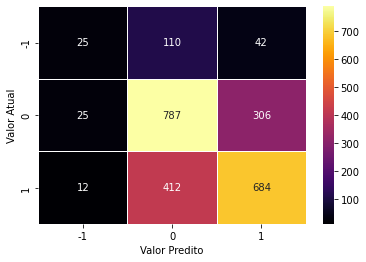

In [46]:
rf_confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Random Forest - Hyperparameter Tuning with Hyperopt - Bayesian Optimization

In [60]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt import space_eval
from hyperopt.pyll import scope

In [61]:
X_train_rfh, X_test_rfh, y_train_rfh, y_test_rfh = train_test_split(np.array(X_rfc), np.array(y_rfc), test_size=0.1, stratify=y_rfc, random_state=SEED)

print('Shape do Conjunto de Treino: ', X_train_rfh.shape)
print('Shape das labels de Treino: ', y_train_rfh.shape)
print('Shape do Conjunto de Teste: ', X_test_rfh.shape)
print('Shape das labels de Teste: ', y_test_rfh.shape)

Shape do Conjunto de Treino:  (21627, 300)
Shape das labels de Treino:  (21627,)
Shape do Conjunto de Teste:  (2403, 300)
Shape das labels de Teste:  (2403,)


In [63]:
def train_model_search(train, valid, y_train, y_val):
    def objective(params):
        rfc = RandomForestClassifier(**params,
                                     random_state=SEED,
                                     class_weight='balanced_subsample',
                                     n_jobs=-1)
        model_rfc = rfc.fit(train, y_train)
        
        cv_results = cross_val_score(rfc, train, y_train, 
                                     scoring=f1_weighted_scorer, 
                                     cv=cv, n_jobs=-1)
        
        return {'loss': -cv_results.mean(), 'status': STATUS_OK}
    
    search_space = {
        'max_depth': scope.int(hp.choice('max_depth', range(5,20))),
        'criterion': hp.choice('criterion', ['gini', 'entropy']),
        'min_samples_split': hp.choice('min_samples_split', range(5,20)),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(5,20)),
        'n_estimators': hp.choice('n_estimators', range(60,101)),
        'max_features': hp.choice('max_features', ['sqrt', 'log2'])
    }
    
    TRIALS = Trials()
    best_result = fmin(
        fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=500,
        trials=TRIALS
    )
    return space_eval(search_space, best_result), TRIALS

#best_params, trials = train_model_search(X_train_rfh, X_valid_rfh, y_train_rfh, y_valid_rfh)
best_params, trials = train_model_search(X_train_rfh, _, y_train_rfh, _)
print(best_params)
#print(trials.losses())

100%|███████████████████████████████████████████| 500/500 [5:51:28<00:00, 42.18s/trial, best loss: -0.6058626366063324]
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 100}


In [64]:
best_score = (-1) * min(trials.losses())
print(best_score)

0.6058626366063324


In [65]:
for trial in trials.trials[:2]:
    print(trial)

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.5825037434279763, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'criterion': [0], 'max_depth': [0], 'max_features': [0], 'min_samples_leaf': [0], 'min_samples_split': [0], 'n_estimators': [0]}, 'vals': {'criterion': [1], 'max_depth': [4], 'max_features': [1], 'min_samples_leaf': [0], 'min_samples_split': [9], 'n_estimators': [9]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 10, 3, 17, 26, 25, 173000), 'refresh_time': datetime.datetime(2022, 10, 3, 17, 26, 45, 239000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.5952991509464154, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'criterion': [1], 'max_depth': [1], 'max_features': [1], 'min_samples_leaf': [1], 'min_samples_split': [1], 'n_estimators': [1]}, 'vals': {'criterion': [1], 'max_depth': [6], 

In [66]:
# summarize result for random forest
print('=========Random Search Results for RandomForest==========')
print('Best Score: %s' % ((-1) * min(trials.losses())))
print('Best Hyperparameters: %s' % best_params)

# Instanciando e avaliando o modelo
RFC = RandomForestClassifier(**best_params, 
                             random_state=SEED, 
                             class_weight='balanced_subsample',
                             n_jobs=-1)

model = RFC.fit(X_train_rfh, y_train_rfh)
y_predicted = RFC.predict(X_test_rfh)

print('\nDesempenho médio do RandomForest:')

cv_results = cross_val_score(RFC, X_train_rfh, y_train_rfh, cv=cv, scoring=f1_weighted_scorer)
# cv_models_results['randomForest'] = cv_results

name = 'RandomForest'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia do Random Forest: Treinamento",  RFC.score(X_train_rfh, y_train_rfh)," Teste", RFC.score(X_test_rfh, y_test_rfh))
print("\nClassification report:\n", classification_report(y_test_rfh, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test_rfh, y_predicted))

=========Random Search Results for RandomForest==========
Best Score: 0.6058626366063324
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 100}

Desempenho médio do RandomForest:
RandomForest: 0.605863 (0.009964)

Acuracia do Random Forest: Treinamento 0.9327229851574421  Teste 0.6138160632542655

Classification report:
               precision    recall  f1-score   support

          -1       0.41      0.14      0.21       177
           0       0.59      0.68      0.63      1118
           1       0.65      0.62      0.64      1108

    accuracy                           0.61      2403
   macro avg       0.55      0.48      0.49      2403
weighted avg       0.61      0.61      0.60      2403

Confusion matrix:
 [[ 25 113  39]
 [ 29 758 331]
 [  7 409 692]]


## C1.1: XGBoost

In [47]:
import xgboost
from xgboost import XGBClassifier

C:\Users\dsm3\anaconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
xgboost.__version__

'1.5.1'

In [49]:
xgb = XGBClassifier(
                    booster='gbtree',
                    objective='multi:softmax', num_class=3, max_depth=15,
                    learning_rate=0.1, n_estimators=100,
                    random_state=SEED, n_jobs=-1 #, tree_method='gpu_hist', gpu_id=0
)

In [50]:
le_xgb = LabelEncoder()

y_xgb = le_xgb.fit_transform(y)

# Divisao da base de dados em treinamento, validacao e teste
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_rfc, y_xgb, test_size=0.1, stratify=y_xgb, random_state=SEED)

In [51]:
le_xgb.classes_

array([-1,  0,  1], dtype=int8)

In [52]:
list(le_xgb.inverse_transform([0,1,2]))

[-1, 0, 1]

In [53]:
from sklearn.utils.class_weight import compute_sample_weight
SAMPLE_WEIGHT = compute_sample_weight(
    class_weight='balanced',
    y=y_train_xgb #provide your own target name
)

#xgb_classifier.fit(X, y, sample_weight=sample_weights)
print(SAMPLE_WEIGHT)

[4.54253308 0.71617326 0.72277923 ... 0.72277923 0.71617326 0.72277923]


In [54]:
model = xgb.fit(X_train_xgb, y_train_xgb, sample_weight = SAMPLE_WEIGHT)
y_predicted_xgb = xgb.predict(X_test_xgb)

print("\nClassification report:\n", classification_report(le_xgb.inverse_transform(y_test_xgb), le_xgb.inverse_transform(y_predicted_xgb)))
print("Confusion matrix:\n", confusion_matrix(y_test_xgb, y_predicted_xgb))

C:\Users\dsm3\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
               precision    recall  f1-score   support

          -1       0.43      0.07      0.12       177
           0       0.61      0.69      0.65      1118
           1       0.66      0.66      0.66      1108

    accuracy                           0.63      2403
   macro avg       0.57      0.47      0.47      2403
weighted avg       0.62      0.63      0.61      2403

Confusion matrix:
 [[ 12 114  51]
 [ 12 774 332]
 [  4 376 728]]


In [55]:
PARAM_DISTRIBUTIONS = [
    {
      'n_estimators': [75, 85, 100, 125, 150, 175, 200, 225],
      'learning_rate':[0.01, 0.1, 0.2, 0.3],
      'max_depth':[5, 6, 7, 8, 9, 10, 12, 14],
      'booster':['gbtree', 'gblinear'],
      'objective':['multi:softmax'],
      'gamma':[0.1, 0.5, 1.0, 1.5],
      'min_child_weight':[1, 2, 3, 4, 5],
      'subsample':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bynode':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bylevel':[0.5, 0.7, 0.8, 0.9, 1]
    }
  ]

In [56]:
rnd_search = RandomizedSearchCV(estimator=xgb, 
                                param_distributions = PARAM_DISTRIBUTIONS, 
                                n_iter=25, scoring=f1_weighted_scorer,
                                n_jobs=-1, cv=cv, random_state=SEED
                              )
rnd_search.fit(X_train_xgb, y_train_xgb, sample_weight = SAMPLE_WEIGHT)

C:\Users\dsm3\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:53:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=15, min_child_weig...
                                         'colsample_bynode': [0.5, 0.7, 0.8,
                                                              0.9, 1],
                                         'colsample_bytree': [0.5, 0.7, 0.8,
                                          

In [57]:
rnd_search.best_params_

{'subsample': 1,
 'objective': 'multi:softmax',
 'n_estimators': 225,
 'min_child_weight': 5,
 'max_depth': 14,
 'learning_rate': 0.01,
 'gamma': 1.5,
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.9,
 'colsample_bylevel': 0.7,
 'booster': 'gbtree'}

In [58]:
hyper_xgb = XGBClassifier(**rnd_search.best_params_, random_state=SEED)
print(hyper_xgb.get_params)
print('\n')

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=0.9, colsample_bytree=0.5,
              enable_categorical=False, gamma=1.5, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=14,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=225, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, random_state=1275,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=1, tree_method=None, validate_parameters=None,
              verbosity=None)>




In [67]:
model_hyper = hyper_xgb.fit(X_train_xgb, y_train_xgb, sample_weight=SAMPLE_WEIGHT)
y_predicted_xgb_h = hyper_xgb.predict(X_test_xgb)

print("\nClassification report:\n", classification_report(le_xgb.inverse_transform(y_test_xgb), le_xgb.inverse_transform(y_predicted_xgb_h)))
print("Confusion matrix:\n", confusion_matrix(y_test_xgb, y_predicted_xgb_h))

C:\Users\dsm3\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
               precision    recall  f1-score   support

          -1       0.38      0.10      0.16       177
           0       0.61      0.69      0.65      1118
           1       0.66      0.65      0.66      1108

    accuracy                           0.63      2403
   macro avg       0.55      0.48      0.49      2403
weighted avg       0.62      0.63      0.62      2403

Confusion matrix:
 [[ 18 120  39]
 [ 20 770 328]
 [  9 376 723]]


## C2: CNN

Tensorflow Addons: https://github.com/tensorflow/addons

In [41]:
#!pip install tensorflow-addons

In [41]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow_addons.metrics.f_scores import F1Score
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D #Embedding, Input

In [42]:
print("Tensorflow Version: ", tf.__version__)
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Tensorflow Adons Version: ", tfa.__version__)

Tensorflow Version:  2.6.0
GPUs Available:  1
Tensorflow Adons Version:  0.16.1


In [43]:
y_enc = pd.get_dummies(y)
y_enc.head()

,-1,0,1
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0


In [44]:
# Divisao da base de dados em treinamento, validacao e teste
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, 
                                                                    y_enc.values, 
                                                                    test_size=0.1, 
                                                                    stratify=y_enc.values, 
                                                                    random_state=SEED)
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train_cnn, 
                                                                      y_train_cnn, 
                                                                      test_size = 0.1, 
                                                                      stratify=y_train_cnn, 
                                                                      random_state=SEED)

print('Shape do Conjunto de Treino: ', X_train_cnn.shape)
print('Shape das labels de Treino: ', y_train_cnn.shape)
print('Shape do Conjunto de Validação: ', X_valid_cnn.shape)
print('Shape das labels de Validação: ', y_valid_cnn.shape)
print('Shape do Conjunto de Teste: ', X_test_cnn.shape)
print('Shape das labels de Teste: ', y_test_cnn.shape)

Shape do Conjunto de Treino:  (19464, 37, 300)
Shape das labels de Treino:  (19464, 3)
Shape do Conjunto de Validação:  (2163, 37, 300)
Shape das labels de Validação:  (2163, 3)
Shape do Conjunto de Teste:  (2403, 37, 300)
Shape das labels de Teste:  (2403, 3)


In [45]:
# Normalização de X para intervalo [-1,1]
X_min = X_train_cnn.min()
X_max = X_train_cnn.max()
range_X = X_max - X_min

X_train_cnn = ((X_train_cnn - X_min)/range_X - 0.5) * 2
X_valid_cnn = ((X_valid_cnn - X_min)/range_X - 0.5) * 2
X_test_cnn = ((X_test_cnn - X_min)/range_X - 0.5) * 2

print('Range Treinamento:', [X_train_cnn.min(), X_train_cnn.max()])
print('Range Validação:', [X_valid_cnn.min(), X_valid_cnn.max()])
print('Range Teste:', [X_test_cnn.min(), X_test_cnn.max()])
#print(X.shape)

Range Treinamento: [-1.0, 1.0]
Range Validação: [-1.0, 1.0]
Range Teste: [-1.0, 1.0]


In [47]:
#max_len = 37
#VECTOR_SIZE = 300

INPUT_SHAPE = (max_len, VECTOR_SIZE,)

# Hiperparameters
FILTERS_LAYER_1=16
KERNEL_SIZE=3
HIDDEN_LAYER_1_NODES=25
HIDDEN_LAYER_2_NODES=10
DROPOUT_PROB=0.30

model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(FILTERS_LAYER_1, 
                        KERNEL_SIZE, 
                        strides= 1, 
                        padding="same", 
                        activation='relu',
                        name='convolutional_layer',
                        input_shape=INPUT_SHAPE),
    keras.layers.GlobalMaxPooling1D(name='global_max_pooling_1d'),
    keras.layers.Dense(HIDDEN_LAYER_1_NODES, activation='relu', name='hidden_layer_1'),
    keras.layers.Dropout(DROPOUT_PROB, name='dropout_1'),
    keras.layers.Dense(HIDDEN_LAYER_2_NODES, activation='relu', name='hidden_layer_2'),
    keras.layers.Dropout(DROPOUT_PROB, name='dropout_2'),
    keras.layers.Dense(3, activation='softmax', name='output_layer')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolutional_layer (Conv1D) (None, 37, 16)            14416     
_________________________________________________________________
global_max_pooling_1d (Globa (None, 16)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 25)                425       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 10)                260       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 3

In [48]:
from keras.utils.vis_utils import plot_model

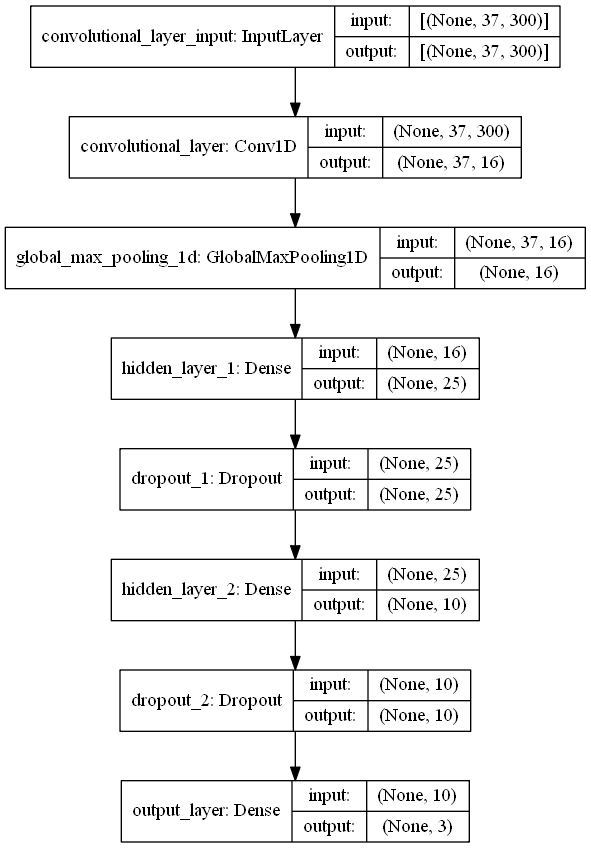

In [49]:
plot_model(model_cnn, to_file='model_cnn_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
values, counts = np.unique(y, return_counts=True)
print(values)
print(counts)

[-1  0  1]
[ 1764 11184 11082]


In [47]:
weight_for_0 = (1/counts[0]) * (len(y)/3.0)
weight_for_1 = (1/counts[1]) * (len(y)/3.0)
weight_for_2 = (1/counts[2]) * (len(y)/3.0)

CLASS_WEIGHT = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Classe -1:', weight_for_0)
print('Classe 0:', weight_for_1)
print('Classe 1:', weight_for_2)

Classe -1: 4.540816326530613
Classe 0: 0.7162017167381974
Classe 1: 0.7227937195452084


In [52]:
F1_WEIGHTED = F1Score(num_classes=3, average="weighted", threshold=0.5)
METRICS = [F1_WEIGHTED, 'accuracy']
OPTIMIZER = tf.keras.optimizers.Adamax(learning_rate=3e-4, decay=1e-6)

model_cnn.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics= METRICS)

In [48]:
BATCH_SIZE = 150    # Tamanho do batch de treinamento
N_EPOCHS = 250

In [142]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                            mode='max', 
                                            patience=15, 
                                            restore_best_weights=True) 

history_cnn = model_cnn.fit(
                            x=X_train_cnn, 
                            y=y_train_cnn, 
                            epochs=N_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            verbose='auto', 
                            validation_data=(X_valid_cnn,y_valid_cnn),
                            callbacks=[callback],
                            class_weight=CLASS_WEIGHT
                          )
print('\nQuantidade de épocas executadas: ', len(history_cnn.history['val_loss']))

Epoch 1/250
130/130 [==============================] - 2s 10ms/step - loss: 1.1081 - f1_score: 0.0071 - accuracy: 0.2763 - val_loss: 1.1144 - val_f1_score: 0.0000e+00 - val_accuracy: 0.2312
Epoch 2/250
130/130 [==============================] - 1s 8ms/step - loss: 1.0906 - f1_score: 0.0039 - accuracy: 0.3051 - val_loss: 1.1066 - val_f1_score: 0.0000e+00 - val_accuracy: 0.3218
Epoch 3/250
130/130 [==============================] - 1s 8ms/step - loss: 1.0781 - f1_score: 0.0071 - accuracy: 0.3475 - val_loss: 1.1011 - val_f1_score: 0.0000e+00 - val_accuracy: 0.3583
Epoch 4/250
130/130 [==============================] - 1s 8ms/step - loss: 1.0712 - f1_score: 0.0115 - accuracy: 0.3670 - val_loss: 1.0891 - val_f1_score: 0.0000e+00 - val_accuracy: 0.3971
Epoch 5/250
130/130 [==============================] - 1s 8ms/step - loss: 1.0603 - f1_score: 0.0223 - accuracy: 0.3918 - val_loss: 1.0769 - val_f1_score: 0.0043 - val_accuracy: 0.4142
Epoch 6/250
130/130 [==============================] - 1s 

130/130 [==============================] - 1s 8ms/step - loss: 0.8678 - f1_score: 0.3683 - accuracy: 0.5402 - val_loss: 0.9666 - val_f1_score: 0.3342 - val_accuracy: 0.5081
Epoch 46/250
130/130 [==============================] - 1s 8ms/step - loss: 0.8677 - f1_score: 0.3688 - accuracy: 0.5361 - val_loss: 0.9442 - val_f1_score: 0.3413 - val_accuracy: 0.5206
Epoch 47/250
130/130 [==============================] - 1s 8ms/step - loss: 0.8676 - f1_score: 0.3724 - accuracy: 0.5384 - val_loss: 0.9455 - val_f1_score: 0.3451 - val_accuracy: 0.5206
Epoch 48/250
130/130 [==============================] - 1s 9ms/step - loss: 0.8583 - f1_score: 0.3803 - accuracy: 0.5419 - val_loss: 0.9578 - val_f1_score: 0.3471 - val_accuracy: 0.5123
Epoch 49/250
130/130 [==============================] - 1s 8ms/step - loss: 0.8508 - f1_score: 0.3789 - accuracy: 0.5420 - val_loss: 0.9618 - val_f1_score: 0.3512 - val_accuracy: 0.5095
Epoch 50/250
130/130 [==============================] - 1s 8ms/step - loss: 0.8549 

Epoch 133/250
130/130 [==============================] - 1s 8ms/step - loss: 0.6313 - f1_score: 0.5745 - accuracy: 0.6176 - val_loss: 1.0186 - val_f1_score: 0.5425 - val_accuracy: 0.5539
Epoch 134/250
130/130 [==============================] - 1s 8ms/step - loss: 0.6260 - f1_score: 0.5741 - accuracy: 0.6202 - val_loss: 1.0286 - val_f1_score: 0.5416 - val_accuracy: 0.5548
Epoch 135/250
130/130 [==============================] - 1s 8ms/step - loss: 0.6284 - f1_score: 0.5775 - accuracy: 0.6208 - val_loss: 1.0134 - val_f1_score: 0.5439 - val_accuracy: 0.5548
Epoch 136/250
130/130 [==============================] - 1s 8ms/step - loss: 0.6226 - f1_score: 0.5818 - accuracy: 0.6266 - val_loss: 1.0387 - val_f1_score: 0.5401 - val_accuracy: 0.5497
Epoch 137/250
130/130 [==============================] - 1s 8ms/step - loss: 0.6164 - f1_score: 0.5916 - accuracy: 0.6313 - val_loss: 1.0323 - val_f1_score: 0.5489 - val_accuracy: 0.5548
Epoch 138/250
130/130 [==============================] - 1s 8ms/s

In [143]:
valid_loss_cnn, valid_f1_score_cnn, valid_acc_cnn = model_cnn.evaluate(X_valid_cnn, 
                                                                       y_valid_cnn, 
                                                                       verbose = 'auto')

print('Valid Loss:', valid_loss_cnn)
print('Valid F1 Score:', valid_f1_score_cnn)
print('Valid Accuracy:', valid_acc_cnn)

Valid Loss: 1.0386799573898315
Valid F1 Score: 0.5607837438583374
Valid Accuracy: 0.5644937753677368


In [144]:
test_loss_cnn, test_f1_score_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, 
                                                                    y_test_cnn,
                                                                    verbose = 'auto')

print('Test Loss:', test_loss_cnn)
print('Test F1 Score:', test_f1_score_cnn)
print('Test Accuracy:', test_acc_cnn)

Test Loss: 1.066184163093567
Test F1 Score: 0.5579105019569397
Test Accuracy: 0.5680399537086487


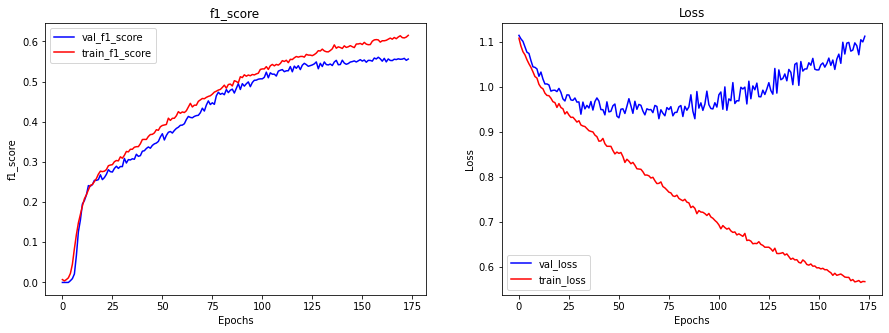

In [145]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_cnn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_cnn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

In [146]:
y_predicted_cnn = model_cnn.predict(X_test_cnn)
#print(np.reshape(y_predicted_cnn, len(y_predicted_cnn)))
y_predicted_cnn

array([[1.3371183e-02, 6.0109985e-01, 3.8552898e-01],
       [6.4938748e-03, 6.1048228e-01, 3.8302386e-01],
       [8.0751427e-02, 5.7652855e-01, 3.4272003e-01],
       ...,
       [1.5594482e-02, 5.3821981e-01, 4.4618571e-01],
       [7.3995620e-01, 2.1986051e-01, 4.0183246e-02],
       [1.4386013e-04, 4.6765271e-01, 5.3220344e-01]], dtype=float32)

In [147]:
y_pred_cnn_1d = [] # -1 0 1 ==== 0 1 2
y_test_cnn_1d = []

for prob in y_predicted_cnn:
    y_pred_cnn_1d.append(np.argmax(prob)-1)

for cl in y_test_cnn:
    y_test_cnn_1d.append(np.argmax(cl)-1)

In [148]:
print("\nClasification report:\n", classification_report(y_test_cnn_1d, y_pred_cnn_1d))
print("Confusion matrix:\n", confusion_matrix(y_test_cnn_1d, y_pred_cnn_1d))


Clasification report:
               precision    recall  f1-score   support

          -1       0.16      0.23      0.18       177
           0       0.59      0.57      0.58      1118
           1       0.64      0.62      0.63      1108

    accuracy                           0.57      2403
   macro avg       0.46      0.47      0.47      2403
weighted avg       0.58      0.57      0.57      2403

Confusion matrix:
 [[ 40  97  40]
 [140 634 344]
 [ 77 340 691]]


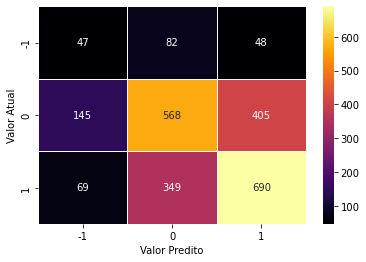

In [92]:
cnn_confusion_matrix = pd.crosstab(np.reshape(y_test_cnn_1d, len(y_test_cnn_1d)), np.reshape(y_pred_cnn_1d, len(y_pred_cnn_1d)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Sobreamostragem - Balanceamento do Conjunto de Treinamento 

In [93]:
# Preenchimento de listas com os registros correspondentes a cada classe
pos_features = []
neg_features = []
neutral_features = []

pos_labels = []
neg_labels = []
neutral_labels = [] # -1 0 1

for index,label in enumerate(y_train_cnn):
    if label[2] == 1:
        pos_labels.append(label)
        pos_features.append(X_train_cnn[index])
    elif label[0] == 1:
        neg_labels.append(label)
        neg_features.append(X_train_cnn[index])
    else:
        neutral_labels.append(label)
        neutral_features.append(X_train_cnn[index])

In [94]:
len(neg_features)

1428

In [95]:
# Escolhendo o número certo de índices aleatórios das labels positivo e neutro

ids_pos = np.arange(len(pos_features))
ids_neutral = np.arange(len(neutral_features))

choices_pos = np.random.choice(ids_pos, size=len(neg_features))
choices_neutral = np.random.choice(ids_neutral, size=len(neg_features))

print(ids_pos)
print(ids_neutral)
print(choices_pos)
print(choices_neutral)

[   0    1    2 ... 8974 8975 8976]
[   0    1    2 ... 9056 9057 9058]
[7114 3635 3827 ... 3385 8211 3941]
[4193 6227  617 ... 6915 3073  893]


In [96]:
# Selecionando os registros baseados nos indices aleatórios obtidos
res_pos_features = []
res_pos_labels = []
res_neutral_features = []
res_neutral_labels = []

for index in choices_pos:
    res_pos_features.append(pos_features[index])
    res_pos_labels.append(pos_labels[index])
    
for index in choices_neutral:
    res_neutral_features.append(neutral_features[index])
    res_neutral_labels.append(neutral_labels[index])

In [97]:
# Compondo o conjunto final de dados balanceados
resampled_features = np.concatenate([res_pos_features, res_neutral_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, res_neutral_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(4284, 37, 300)

In [98]:
resampled_labels.shape

(4284, 3)

In [99]:
# Verificação da distribuição das classes no conjunto de treinamento balanceado
values, counts = np.unique(resampled_labels, axis=0, return_counts=True)
print('Labels:', values)
print('Distribuição (%):', np.around(100*(counts/len(resampled_labels)),2))

Labels: [[0 0 1]
 [0 1 0]
 [1 0 0]]
Distribuição (%): [33.33 33.33 33.33]


In [100]:
INPUT_SHAPE = (max_len, VECTOR_SIZE,)

# Hiperparameters
FILTERS_LAYER_1=16
KERNEL_SIZE=3
HIDDEN_LAYER_1_NODES=25
HIDDEN_LAYER_2_NODES=10
DROPOUT_PROB=0.30

model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(FILTERS_LAYER_1, KERNEL_SIZE, strides= 1, padding="same", activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(HIDDEN_LAYER_1_NODES, activation='relu'),
    keras.layers.Dropout(DROPOUT_PROB),
    keras.layers.Dense(HIDDEN_LAYER_2_NODES, activation='relu'),
    keras.layers.Dropout(DROPOUT_PROB),
    keras.layers.Dense(3, activation='softmax')
])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 37, 16)            14416     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                425       
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

In [101]:
METRICS = [F1Score(num_classes=3, average="weighted", threshold=0.5), 'accuracy']
model_cnn.compile(loss="categorical_crossentropy", optimizer="adamax", metrics= METRICS)

In [102]:
BATCH_SIZE = 50    # Tamanho do batch de treinamento
N_EPOCHS = 150

In [103]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                            mode='max', 
                                            patience=15, 
                                            restore_best_weights=True) 

history_cnn = model_cnn.fit(
                            x=resampled_features, 
                            y=resampled_labels, 
                            epochs=N_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            verbose='auto', 
                            validation_data=(X_valid_cnn,y_valid_cnn),
                            callbacks=[callback]
                          )
print('\nQuantidade de épocas executadas: ', len(history_cnn.history['val_loss']))

Epoch 1/150
86/86 [==============================] - 2s 12ms/step - loss: 1.0999 - f1_score: 0.0000e+00 - accuracy: 0.3401 - val_loss: 1.0979 - val_f1_score: 0.0000e+00 - val_accuracy: 0.3435
Epoch 2/150
86/86 [==============================] - 1s 8ms/step - loss: 1.0906 - f1_score: 0.0000e+00 - accuracy: 0.3835 - val_loss: 1.1045 - val_f1_score: 0.0000e+00 - val_accuracy: 0.2825
Epoch 3/150
86/86 [==============================] - 1s 8ms/step - loss: 1.0745 - f1_score: 0.0163 - accuracy: 0.4162 - val_loss: 1.1000 - val_f1_score: 0.0000e+00 - val_accuracy: 0.3412
Epoch 4/150
86/86 [==============================] - 1s 8ms/step - loss: 1.0572 - f1_score: 0.0526 - accuracy: 0.4412 - val_loss: 1.0858 - val_f1_score: 0.0018 - val_accuracy: 0.3722
Epoch 5/150
86/86 [==============================] - 1s 8ms/step - loss: 1.0437 - f1_score: 0.1049 - accuracy: 0.4484 - val_loss: 1.0499 - val_f1_score: 0.0150 - val_accuracy: 0.4263
Epoch 6/150
86/86 [==============================] - 1s 8ms/step

In [104]:
valid_loss_cnn, valid_f1_score_cnn, valid_acc_cnn = model_cnn.evaluate(X_valid_cnn, y_valid_cnn, verbose = 'auto')

print('Valid Loss:', valid_loss_cnn)
print('Valid F1 Score:', valid_f1_score_cnn)
print('Valid Accuracy:', valid_acc_cnn)

Valid Loss: 1.4716795682907104
Valid F1 Score: 0.4884398579597473
Valid Accuracy: 0.48266297578811646


In [105]:
test_loss_cnn, test_f1_score_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose = 'auto')

print('Test Loss:', test_loss_cnn)
print('Test F1 Score:', test_f1_score_cnn)
print('Test Accuracy:', test_acc_cnn)

Test Loss: 1.5138598680496216
Test F1 Score: 0.48543769121170044
Test Accuracy: 0.47981688380241394


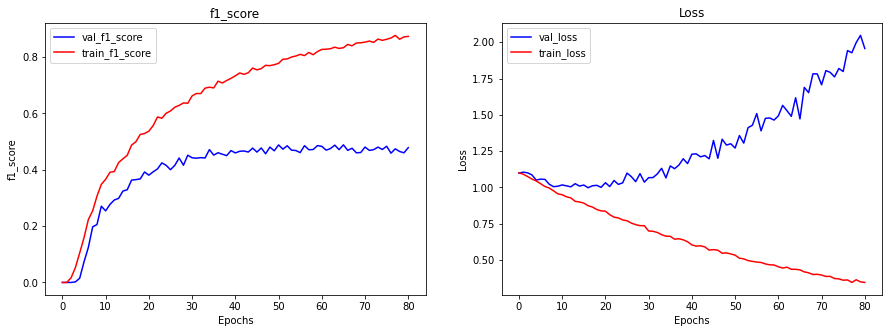

In [106]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_cnn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_cnn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

In [107]:
y_predicted_cnn = model_cnn.predict(X_test_cnn)
#print(np.reshape(y_predicted_cnn, len(y_predicted_cnn)))
y_predicted_cnn

array([[6.10383116e-02, 2.05714762e-01, 7.33246922e-01],
       [1.21018015e-01, 9.43322778e-02, 7.84649670e-01],
       [1.89164534e-01, 8.03771436e-01, 7.06398627e-03],
       ...,
       [3.29018533e-02, 2.03244343e-01, 7.63853788e-01],
       [3.16449642e-01, 6.05476320e-01, 7.80741051e-02],
       [2.75095335e-05, 4.65221070e-02, 9.53450382e-01]], dtype=float32)

In [108]:
y_pred_cnn_1d = [] # -1 0 1 ==== 0 1 2
y_test_cnn_1d = []

for prob in y_predicted_cnn:
    y_pred_cnn_1d.append(np.argmax(prob)-1)

for cl in y_test_cnn:
    y_test_cnn_1d.append(np.argmax(cl)-1)

In [109]:
print("\nClasification report:\n", classification_report(y_test_cnn_1d, y_pred_cnn_1d))
print("Confusion matrix:\n", confusion_matrix(y_test_cnn_1d, y_pred_cnn_1d))


Clasification report:
               precision    recall  f1-score   support

          -1       0.14      0.42      0.21       177
           0       0.55      0.43      0.48      1118
           1       0.60      0.54      0.57      1108

    accuracy                           0.48      2403
   macro avg       0.43      0.46      0.42      2403
weighted avg       0.54      0.48      0.50      2403

Confusion matrix:
 [[ 75  54  48]
 [282 478 358]
 [170 338 600]]


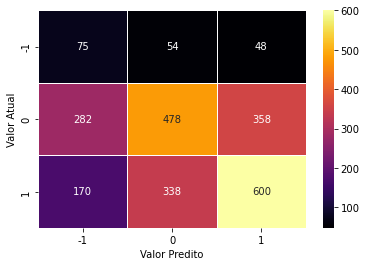

In [110]:
cnn_confusion_matrix = pd.crosstab(np.reshape(y_test_cnn_1d, len(y_test_cnn_1d)), np.reshape(y_pred_cnn_1d, len(y_pred_cnn_1d)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Ajuste dos Hiperparâmetros com keras tuner - CNN

In [54]:
#!pip install -q -U keras-tuner

In [49]:
import keras_tuner as kt

In [51]:
precision = tf.keras.metrics.Precision(thresholds=0.5, name='precision')
recall = tf.keras.metrics.Recall(thresholds=0.5, name='recall')
f1 = F1Score(num_classes=3, average="weighted", threshold=0.5)

METRICS_HP = [f1, 'categorical_accuracy', precision, recall]

def model_cnn_builder(hp):
  # Hiperparameters
  KERNEL_SIZE = 3
  INPUT_SHAPE = (max_len, VECTOR_SIZE,)

  HP_DROPOUT_PROB = hp.Choice('dropout', values=[0.30, 0.40])  
  HP_FILTERS_LAYER_1 = hp.Int('filters_1', min_value=16, max_value=256, step=16)
  HP_HIDDEN_LAYER_1_UNITS = hp.Int('units_1', min_value=10, max_value=100, step=10)
  HP_HIDDEN_LAYER_2_UNITS = hp.Int('units_2', min_value=10, max_value=50, step=10)

  model_cnn_tn = keras.models.Sequential([
      keras.layers.Conv1D(filters=HP_FILTERS_LAYER_1, kernel_size=KERNEL_SIZE, strides= 1, padding="same", activation='relu', input_shape=INPUT_SHAPE),
      keras.layers.GlobalMaxPooling1D(),
      keras.layers.Dense(units=HP_HIDDEN_LAYER_1_UNITS, activation='relu'),
      keras.layers.Dropout(HP_DROPOUT_PROB),
      keras.layers.Dense(units=HP_HIDDEN_LAYER_2_UNITS, activation='relu'),
      keras.layers.Dropout(HP_DROPOUT_PROB),
      keras.layers.Dense(3, activation='softmax')
  ])
    
  #from tensorflow_addons.metrics.f_scores import F1Score

  HP_LEARNING_RATE = hp.Float('learning_rate', min_value=3e-6, max_value=1e-3, sampling="log")

  model_cnn_tn.compile(
      loss="categorical_crossentropy", 
      optimizer=keras.optimizers.Adamax(learning_rate=HP_LEARNING_RATE, decay=1e-6), 
      metrics=METRICS_HP
  )

  return model_cnn_tn

In [52]:
MAX_EPOCHS = 100

tuner_cnn = kt.Hyperband(
                          model_cnn_builder,
                          objective= kt.Objective('val_f1_score', direction='max'),
                          max_epochs=MAX_EPOCHS,
                          factor=3,
                          seed=SEED,
                          directory='tcc-cnn_stem_tuner_dir_1',
                          project_name='cnn_stem_tuner_val_f1_score_2_optim_adamax'
                        )
#tuner_cnn.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project tcc-cnn_stem_tuner_dir_1\cnn_stem_tuner_val_f1_score_2_optim_adamax\oracle.json
INFO:tensorflow:Reloading Tuner from tcc-cnn_stem_tuner_dir_1\cnn_stem_tuner_val_f1_score_2_optim_adamax\tuner0.json


In [201]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                              mode='max', 
                                              patience=10, 
                                              restore_best_weights=True)
BATCH_SIZE = 150    # Tamanho do batch de treinamento
N_EPOCHS = 200

tuner_cnn.search(
                  x=X_train_cnn, 
                  y=y_train_cnn, 
                  epochs=N_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  #verbose='auto', 
                  validation_data=(X_valid_cnn,y_valid_cnn),
                  callbacks=[stop_early],
                  class_weight=CLASS_WEIGHT
                )

Trial 254 Complete [00h 02m 28s]
val_f1_score: 0.4001818597316742

Best val_f1_score So Far: 0.6051665544509888
Total elapsed time: 01h 03m 22s
INFO:tensorflow:Oracle triggered exit


In [53]:
# Get the optimal hyperparameters
best_hps=tuner_cnn.get_best_hyperparameters(num_trials=1)[0]

for h_param in ['units_1', 'units_2'] + ['learning_rate'] + ['filters_1', 'dropout']:
  print(h_param, best_hps.get(h_param))

units_1 20
units_2 30
learning_rate 0.000659708458607571
filters_1 160
dropout 0.3


In [54]:
# Encontre o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_cnn_tn = tuner_cnn.hypermodel.build(best_hps)

history_cnn_tn = model_cnn_tn.fit(
                                    x=X_train_cnn, 
                                    y=y_train_cnn, 
                                    epochs=50, 
                                    batch_size=BATCH_SIZE, 
                                    verbose='auto',
                                    validation_data=(X_valid_cnn,y_valid_cnn),
                                    class_weight=CLASS_WEIGHT 
                                  )

val_f1_per_epoch = history_cnn_tn.history['val_f1_score']
best_epoch = val_f1_per_epoch.index(max(val_f1_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
130/130 [==============================] - 8s 17ms/step - loss: 1.0795 - f1_score: 0.0186 - categorical_accuracy: 0.3884 - precision: 0.7623 - recall: 0.0096 - val_loss: 1.0393 - val_f1_score: 0.0361 - val_categorical_accuracy: 0.4683 - val_precision: 0.8367 - val_recall: 0.0190
Epoch 2/50
130/130 [==============================] - 1s 10ms/step - loss: 1.0408 - f1_score: 0.1277 - categorical_accuracy: 0.4151 - precision: 0.6472 - recall: 0.0776 - val_loss: 1.0072 - val_f1_score: 0.2001 - val_categorical_accuracy: 0.4540 - val_precision: 0.7359 - val_recall: 0.1392
Epoch 3/50
130/130 [==============================] - 1s 11ms/step - loss: 1.0109 - f1_score: 0.1980 - categorical_accuracy: 0.4302 - precision: 0.5861 - recall: 0.1350 - val_loss: 1.0045 - val_f1_score: 0.2284 - val_categorical_accuracy: 0.4716 - val_precision: 0.6700 - val_recall: 0.1540
Epoch 4/50
130/130 [==============================] - 1s 11ms/step - loss: 0.9816 - f1_score: 0.2531 - categorical_accuracy: 0.

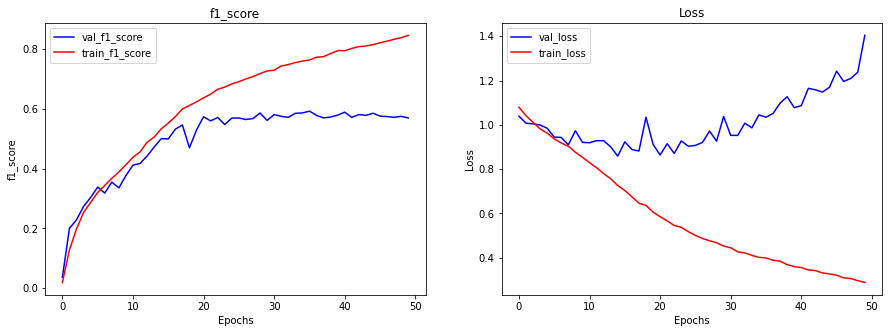

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_tn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_cnn_tn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn_tn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_cnn_tn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

In [56]:
hypermodel_cnn = tuner_cnn.hypermodel.build(best_hps)

# Retrain the model
hypermodel_cnn.fit(
                    x=X_train_cnn, 
                    y=y_train_cnn,  
                    epochs=best_epoch,
                    batch_size=BATCH_SIZE, 
                    verbose='auto',
                    validation_data=(X_valid_cnn,y_valid_cnn),
                    class_weight=CLASS_WEIGHT
                  )

Epoch 1/36
130/130 [==============================] - 4s 17ms/step - loss: 1.0729 - f1_score: 0.1543 - categorical_accuracy: 0.4293 - precision: 0.6120 - recall: 0.0888 - val_loss: 1.0408 - val_f1_score: 0.1255 - val_categorical_accuracy: 0.3638 - val_precision: 0.8150 - val_recall: 0.0754
Epoch 2/36
130/130 [==============================] - 1s 11ms/step - loss: 1.0260 - f1_score: 0.1846 - categorical_accuracy: 0.4508 - precision: 0.6747 - recall: 0.1235 - val_loss: 1.0218 - val_f1_score: 0.1931 - val_categorical_accuracy: 0.4096 - val_precision: 0.7936 - val_recall: 0.1262
Epoch 3/36
130/130 [==============================] - 1s 11ms/step - loss: 0.9952 - f1_score: 0.2338 - categorical_accuracy: 0.4705 - precision: 0.6478 - recall: 0.1674 - val_loss: 0.9883 - val_f1_score: 0.2558 - val_categorical_accuracy: 0.4239 - val_precision: 0.7298 - val_recall: 0.1923
Epoch 4/36
130/130 [==============================] - 1s 11ms/step - loss: 0.9754 - f1_score: 0.2724 - categorical_accuracy: 0.

In [57]:
# [f1, 'categorical_accuracy', precision, recall]
test_loss_cnn_tn, test_f1_score_cnn_tn, test_acc_cnn_tn, test_precision_cnn_tn, test_recall_cnn_tn = hypermodel_cnn.evaluate(X_test_cnn, y_test_cnn, verbose = 'auto')

print('Test Loss:', test_loss_cnn_tn)
print('Test F1 Score:', test_f1_score_cnn_tn)
print('Test Acurácia:', test_acc_cnn_tn)
print('Test Precisão:', test_precision_cnn_tn)
print('Test Recall:', test_recall_cnn_tn)

Test Loss: 1.007703185081482
Test F1 Score: 0.5878109931945801
Test Acurácia: 0.5996670722961426
Test Precisão: 0.6021276712417603
Test Recall: 0.588847279548645


In [58]:
y_predicted_hp_cnn = model_cnn_tn.predict(X_test_cnn)

y_pred_cnn_hp_1d = [] # -1 0 1 ==== 0 1 2
y_test_cnn_hp_1d = []

for prob in y_predicted_hp_cnn:
    y_pred_cnn_hp_1d.append(np.argmax(prob)-1)

for cl in y_test_cnn:
    y_test_cnn_hp_1d.append(np.argmax(cl)-1)

In [59]:
print("\nClassification report:\n", classification_report(y_test_cnn_hp_1d, y_pred_cnn_hp_1d))
print("Confusion matrix:\n", confusion_matrix(y_test_cnn_hp_1d, y_pred_cnn_hp_1d))


Classification report:
               precision    recall  f1-score   support

          -1       0.17      0.18      0.17       177
           0       0.57      0.68      0.62      1118
           1       0.68      0.55      0.60      1108

    accuracy                           0.58      2403
   macro avg       0.47      0.47      0.47      2403
weighted avg       0.59      0.58      0.58      2403

Confusion matrix:
 [[ 31 118  28]
 [ 98 758 262]
 [ 57 447 604]]


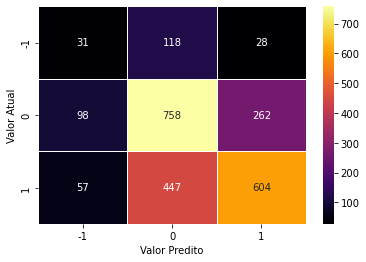

In [61]:
cnn_confusion_matrix = pd.crosstab(y_test_cnn_hp_1d, 
                                   y_pred_cnn_hp_1d, 
                                   rownames=['Valor Atual'], 
                                   colnames=['Valor Predito'])

sn.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

## C3: LSTM

In [52]:
# Divisao da base de dados em treinamento, validacao e teste
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, 
                                                                        y_enc.values, 
                                                                        test_size=0.1, 
                                                                        stratify=y_enc.values, 
                                                                        random_state=SEED)
X_train_lstm, X_valid_lstm, y_train_lstm, y_valid_lstm = train_test_split(X_train_lstm, 
                                                                          y_train_lstm, 
                                                                          test_size = 0.1, 
                                                                          stratify=y_train_lstm, 
                                                                          random_state=SEED)

print('Shape do Conjunto de Treino: ', X_train_lstm.shape)
print('Shape das labels de Treino: ', y_train_lstm.shape)
print('Shape do Conjunto de Validação: ', X_valid_lstm.shape)
print('Shape das labels de Validação: ', y_valid_lstm.shape)
print('Shape do Conjunto de Teste: ', X_test_lstm.shape)
print('Shape das labels de Teste: ', y_test_lstm.shape)

Shape do Conjunto de Treino:  (19464, 37, 300)
Shape das labels de Treino:  (19464, 3)
Shape do Conjunto de Validação:  (2163, 37, 300)
Shape das labels de Validação:  (2163, 3)
Shape do Conjunto de Teste:  (2403, 37, 300)
Shape das labels de Teste:  (2403, 3)


In [53]:
# Normalização de X para intervalo [-1,1]
X_min = X_train_lstm.min()
X_max = X_train_lstm.max()
range_X = X_max - X_min

X_train_lstm = ((X_train_lstm - X_min)/range_X - 0.5) * 2
X_valid_lstm = ((X_valid_lstm - X_min)/range_X - 0.5) * 2
X_test_lstm = ((X_test_lstm - X_min)/range_X - 0.5) * 2

print('Range Treinamento:', [X_train_lstm.min(), X_train_lstm.max()])
print('Range Validação:', [X_valid_lstm.min(), X_valid_lstm.max()])
print('Range Teste:', [X_test_lstm.min(), X_test_lstm.max()])
#print(X.shape)

Range Treinamento: [-1.0, 1.0]
Range Validação: [-1.0, 1.0]
Range Teste: [-1.0, 1.0]


In [15]:
#vocab_size = len(model_amazon.wv.vocab)
#embedding_dim = 10

INPUT_SHAPE = (max_len,VECTOR_SIZE,)

model_lstm = keras.models.Sequential([ 
                         keras.layers.LSTM(16, input_shape=INPUT_SHAPE, activation='tanh', name='lstm_layer'),
                         keras.layers.Dropout(0.3, name='dropout_1'),   # Regularizador
                         keras.layers.Dense(50, activation='relu', name='hidden_layer_1'),
                         keras.layers.Dropout(0.3, name='dropout_2'),   # Regularizador
                         keras.layers.Dense(10, activation='relu', name='hidden_layer_2'),
                         keras.layers.Dropout(0.3, name='dropout_3'),   # Regularizador
                         keras.layers.Dense(3, activation='softmax', name='output_layer')
                        ])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_layer (LSTM)            (None, 16)                20288     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 50)                850       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 10)                510       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                

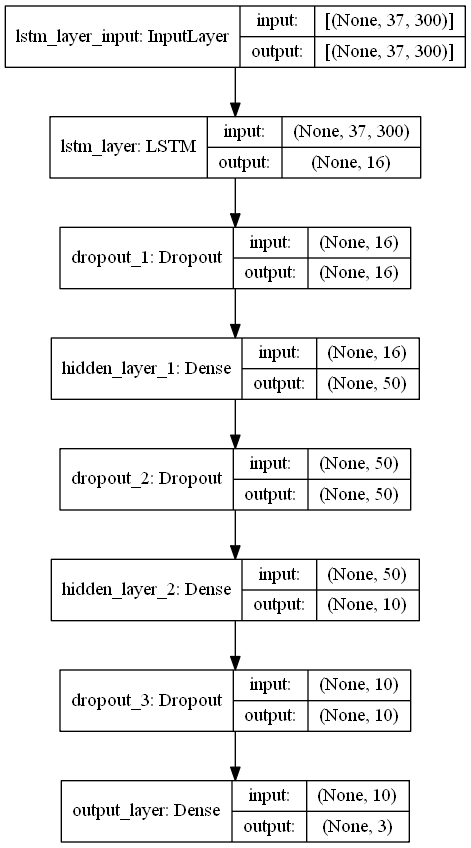

In [16]:
plot_model(model_lstm, to_file='model_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [73]:
#from tensorflow_addons.metrics.f_scores import F1Score

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=3e-4) #, decay=1e-6)

F1_WEIGHTED = F1Score(num_classes=3, average="weighted", threshold=0.5)
METRICS_LSTM = [F1_WEIGHTED, 'accuracy']

model_lstm.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics= METRICS_LSTM)

In [74]:
batch_size = 150    # Tamanho do batch de treinamento
n_epochs = 150

In [75]:
callback_lstm = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                                 mode='max', 
                                                 patience=15, 
                                                 restore_best_weights=True) 

# This callback will stop the training when there is no improvement inthe loss for five consecutive epochs.

history_lstm = model_lstm.fit(
                          x=X_train_lstm, 
                          y=y_train_lstm, 
                          epochs=n_epochs, 
                          batch_size=batch_size, 
                          verbose='auto', 
                          validation_data=(X_valid_lstm,y_valid_lstm),
                          callbacks=[callback_lstm],
                          class_weight=CLASS_WEIGHT
                        )
print('\nQuantidade de épocas executadas: ', len(history_lstm.history['val_f1_score']))

Epoch 1/150
130/130 [==============================] - 4s 17ms/step - loss: 1.0921 - f1_score: 0.0092 - accuracy: 0.4089 - val_loss: 1.0558 - val_f1_score: 0.0000e+00 - val_accuracy: 0.4780
Epoch 2/150
130/130 [==============================] - 1s 11ms/step - loss: 1.0587 - f1_score: 0.1130 - accuracy: 0.4076 - val_loss: 1.0424 - val_f1_score: 0.1621 - val_accuracy: 0.3319
Epoch 3/150
130/130 [==============================] - 1s 11ms/step - loss: 1.0181 - f1_score: 0.1983 - accuracy: 0.3882 - val_loss: 0.9911 - val_f1_score: 0.2665 - val_accuracy: 0.4267
Epoch 4/150
130/130 [==============================] - 1s 11ms/step - loss: 0.9956 - f1_score: 0.2322 - accuracy: 0.4292 - val_loss: 0.9943 - val_f1_score: 0.2698 - val_accuracy: 0.4337
Epoch 5/150
130/130 [==============================] - 1s 11ms/step - loss: 0.9864 - f1_score: 0.2458 - accuracy: 0.4486 - val_loss: 0.9777 - val_f1_score: 0.2654 - val_accuracy: 0.4739
Epoch 6/150
130/130 [==============================] - 1s 11ms/ste

Epoch 45/150
130/130 [==============================] - 1s 11ms/step - loss: 0.8716 - f1_score: 0.4220 - accuracy: 0.5354 - val_loss: 0.9273 - val_f1_score: 0.4002 - val_accuracy: 0.5220
Epoch 46/150
130/130 [==============================] - 1s 11ms/step - loss: 0.8636 - f1_score: 0.4137 - accuracy: 0.5371 - val_loss: 0.9263 - val_f1_score: 0.4118 - val_accuracy: 0.5257
Epoch 47/150
130/130 [==============================] - 1s 11ms/step - loss: 0.8638 - f1_score: 0.4218 - accuracy: 0.5382 - val_loss: 0.9418 - val_f1_score: 0.4214 - val_accuracy: 0.5183
Epoch 48/150
130/130 [==============================] - 1s 11ms/step - loss: 0.8652 - f1_score: 0.4279 - accuracy: 0.5412 - val_loss: 0.9450 - val_f1_score: 0.4137 - val_accuracy: 0.5178
Epoch 49/150
130/130 [==============================] - 1s 11ms/step - loss: 0.8591 - f1_score: 0.4227 - accuracy: 0.5371 - val_loss: 0.9622 - val_f1_score: 0.4136 - val_accuracy: 0.5076
Epoch 50/150
130/130 [==============================] - 1s 11ms/s

Epoch 89/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7684 - f1_score: 0.5110 - accuracy: 0.5689 - val_loss: 0.9610 - val_f1_score: 0.5123 - val_accuracy: 0.5451
Epoch 90/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7676 - f1_score: 0.5118 - accuracy: 0.5706 - val_loss: 0.9562 - val_f1_score: 0.5058 - val_accuracy: 0.5437
Epoch 91/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7661 - f1_score: 0.5113 - accuracy: 0.5681 - val_loss: 0.9596 - val_f1_score: 0.5002 - val_accuracy: 0.5414
Epoch 92/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7601 - f1_score: 0.5186 - accuracy: 0.5713 - val_loss: 0.9810 - val_f1_score: 0.4946 - val_accuracy: 0.5303
Epoch 93/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7555 - f1_score: 0.5202 - accuracy: 0.5733 - val_loss: 1.0239 - val_f1_score: 0.4869 - val_accuracy: 0.5095
Epoch 94/150
130/130 [==============================] - 1s 11ms/s

Epoch 133/150
130/130 [==============================] - 1s 11ms/step - loss: 0.6935 - f1_score: 0.5659 - accuracy: 0.5958 - val_loss: 1.0571 - val_f1_score: 0.5332 - val_accuracy: 0.5418
Epoch 134/150
130/130 [==============================] - 1s 11ms/step - loss: 0.6877 - f1_score: 0.5630 - accuracy: 0.5959 - val_loss: 1.0561 - val_f1_score: 0.5440 - val_accuracy: 0.5566
Epoch 135/150
130/130 [==============================] - 1s 11ms/step - loss: 0.6879 - f1_score: 0.5622 - accuracy: 0.5941 - val_loss: 1.0895 - val_f1_score: 0.5342 - val_accuracy: 0.5418
Epoch 136/150
130/130 [==============================] - 1s 11ms/step - loss: 0.6856 - f1_score: 0.5649 - accuracy: 0.5935 - val_loss: 1.1070 - val_f1_score: 0.5303 - val_accuracy: 0.5377
Epoch 137/150
130/130 [==============================] - 1s 11ms/step - loss: 0.7008 - f1_score: 0.5585 - accuracy: 0.5895 - val_loss: 1.0968 - val_f1_score: 0.5291 - val_accuracy: 0.5294
Epoch 138/150
130/130 [==============================] - 1s 

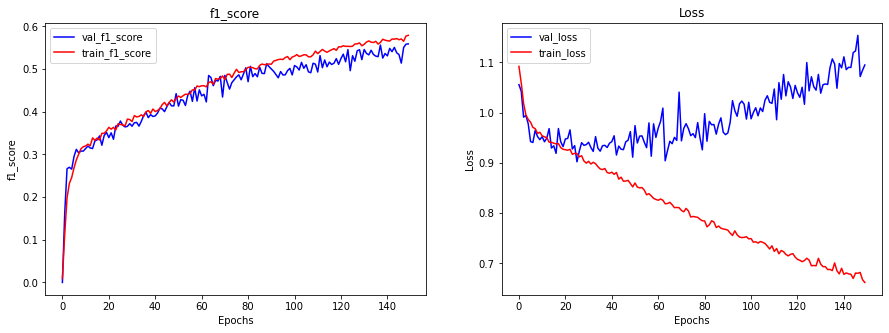

In [76]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_lstm.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_lstm.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

In [77]:
valid_loss_lstm, valid_f1_score_lstm, valid_acc_lstm = model_lstm.evaluate(X_valid_lstm, 
                                                                           y_valid_lstm, 
                                                                           verbose = 'auto')

print('Valid Loss:', valid_loss_lstm)
print('Valid F1 Score:', valid_f1_score_lstm)
print('Valid Accuracy:', valid_acc_lstm)

Valid Loss: 1.0949022769927979
Valid F1 Score: 0.5589617490768433
Valid Accuracy: 0.5649560689926147


In [78]:
test_loss_lstm, test_f1_score_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, 
                                                                        y_test_lstm, 
                                                                        verbose = 'auto')

print('Test Loss:', test_loss_lstm)
print('Test F1 Score:', test_f1_score_lstm)
print('Accuracy:', test_acc_lstm)

Test Loss: 1.1549512147903442
Test F1 Score: 0.5304587483406067
Accuracy: 0.5397419929504395


In [79]:
y_predicted_lstm = model_lstm.predict(X_test_lstm)

y_pred_lstm_1d = [] # -1 0 1 ==== 0 1 2
y_test_lstm_1d = []

for prob in y_predicted_lstm:
    y_pred_lstm_1d.append(np.argmax(prob)-1)

for cl in y_test_lstm:
    y_test_lstm_1d.append(np.argmax(cl)-1)

In [80]:
print("\nClasification report:\n", classification_report(y_test_lstm_1d, y_pred_lstm_1d))
print("Confusion matrix:\n", confusion_matrix(y_test_lstm_1d, y_pred_lstm_1d))


Clasification report:
               precision    recall  f1-score   support

          -1       0.15      0.35      0.21       177
           0       0.59      0.49      0.54      1118
           1       0.65      0.62      0.63      1108

    accuracy                           0.54      2403
   macro avg       0.46      0.49      0.46      2403
weighted avg       0.59      0.54      0.56      2403

Confusion matrix:
 [[ 62  79  36]
 [231 552 335]
 [123 302 683]]


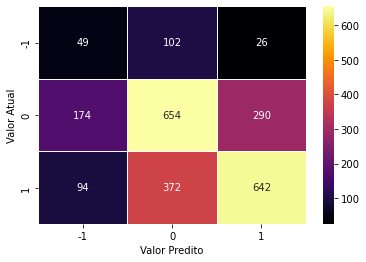

In [187]:
lstm_confusion_matrix = pd.crosstab(y_test_lstm_1d, 
                                    y_pred_lstm_1d, 
                                    rownames=['Valor Atual'], 
                                    colnames=['Valor Predito'])

sn.heatmap(lstm_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Ajuste dos Hiperparâmetros com keras tuner - LSTM

In [112]:
# import keras_tuner as kt

In [190]:
precision = tf.keras.metrics.Precision(thresholds=0.5, name='precision')
recall = tf.keras.metrics.Recall(thresholds=0.5, name='recall')
f1 = F1Score(num_classes=3, average="weighted", threshold=0.5)

METRICS_HP = [f1, 'categorical_accuracy', precision, recall]

def model_lstm_builder(hp):
  # Hiperparameters
  N_CLASS = 3
  INPUT_SHAPE = (max_len, VECTOR_SIZE,)
    
  HP_DROPOUT_PROB = hp.Choice('dropout', values=[0.30, 0.40])  
  HP_LSTM_UNITS = hp.Int('units_1', min_value=8, max_value=32, step=8)
  HP_HIDDEN_LAYER_1_UNITS = hp.Int('units_2', min_value=10, max_value=100, step=10)
  HP_HIDDEN_LAYER_2_UNITS = hp.Int('units_3', min_value=10, max_value=50, step=10)

  INPUT_SHAPE = (max_len,VECTOR_SIZE,)

  model_lstm_tn = keras.models.Sequential([
      keras.layers.LSTM(HP_LSTM_UNITS, input_shape=INPUT_SHAPE, activation='tanh'),
      keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
      keras.layers.Dense(HP_HIDDEN_LAYER_1_UNITS, activation='relu'),
      keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
      keras.layers.Dense(HP_HIDDEN_LAYER_2_UNITS, activation='relu'),
      keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
      keras.layers.Dense(N_CLASS, activation='softmax')
    ])

  HP_LEARNING_RATE = hp.Float('learning_rate', min_value=3e-6, max_value=1e-3, sampling="log")

  model_lstm_tn.compile(
      loss="categorical_crossentropy", 
      optimizer=keras.optimizers.Adam(learning_rate=HP_LEARNING_RATE), 
      metrics= METRICS_HP
  )

  return model_lstm_tn

In [191]:
MAX_EPOCHS = 150

tuner_lstm = kt.Hyperband(
                          model_lstm_builder,
                          objective= kt.Objective("val_f1_score", direction="max"),
                          max_epochs=MAX_EPOCHS,
                          factor=3,
                          seed=SEED,
                          directory='lstm_stem_off_tuner_dir_1',
                          project_name='lstm_stem_off_val_f1_score_1'
                        )
#tuner_cnn.search_space_summary()

In [192]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                              mode='max', 
                                              patience=10, 
                                              restore_best_weights=True)

BATCH_SIZE = 150    # Tamanho do batch de treinamento
N_EPOCHS = 200

tuner_lstm.search(
                  x=X_train_lstm, 
                  y=y_train_lstm, 
                  epochs=N_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  #verbose='auto', 
                  validation_data=(X_valid_lstm,y_valid_lstm),
                  callbacks=[stop_early],
                  class_weight=CLASS_WEIGHT
                )

Trial 230 Complete [00h 01m 09s]
val_f1_score: 0.5111390948295593

Best val_f1_score So Far: 0.5872857570648193
Total elapsed time: 01h 15m 25s

Search: Running Trial #231

Hyperparameter    |Value             |Best Value So Far 
dropout           |0.4               |0.3               
units_1           |32                |24                
units_2           |30                |80                
units_3           |10                |30                
learning_rate     |0.00076417        |0.00081003        
tuner/epochs      |50                |150               
tuner/initial_e...|17                |50                
tuner/bracket     |2                 |4                 
tuner/round       |1                 |4                 
tuner/trial_id    |77fb36f955c1fd3...|4dc7b3ea94daeab...

Epoch 18/50
130/130 [==============================] - 5s 21ms/step - loss: 1.0741 - f1_score: 0.1382 - categorical_accuracy: 0.3631 - precision: 0.5712 - recall: 0.0821 - val_loss: 1.0420 - val_f1_s

UnknownError: Failed to rename: lstm_stem_off_tuner_dir_1\lstm_stem_off_val_f1_score_1\trial_26e417c8cd578f7da72c09113ebc3ff4\checkpoints\epoch_0\checkpoint_temp/part-00000-of-00001.data-00000-of-00001 to: lstm_stem_off_tuner_dir_1\lstm_stem_off_val_f1_score_1\trial_26e417c8cd578f7da72c09113ebc3ff4\checkpoints\epoch_0\checkpoint.data-00000-of-00001 : Access is denied.
; Input/output error [Op:MergeV2Checkpoints]

In [193]:
# Get the optimal hyperparameters
best_hps_lstm=tuner_lstm.get_best_hyperparameters(num_trials=1)[0]

for h_param in ['units_1', 'units_2', 'units_3'] + ['learning_rate','dropout']:
  print(h_param, best_hps_lstm.get(h_param))

units_1 24
units_2 80
units_3 30
learning_rate 0.0008100314866911288
dropout 0.3


In [194]:
# Encontre o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_lstm_tn = tuner_lstm.hypermodel.build(best_hps_lstm)

history_lstm_tn = model_lstm_tn.fit(
                                    x=X_train_lstm, 
                                    y=y_train_lstm, 
                                    epochs=50, 
                                    batch_size=BATCH_SIZE, 
                                    verbose='auto',
                                    validation_data=(X_valid_lstm,y_valid_lstm),
                                    class_weight=CLASS_WEIGHT
                                  )

val_loss_per_epoch = history_lstm_tn.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
130/130 [==============================] - 6s 28ms/step - loss: 1.0363 - f1_score: 0.1906 - categorical_accuracy: 0.4128 - precision: 0.5523 - recall: 0.1265 - val_loss: 0.9891 - val_f1_score: 0.2654 - val_categorical_accuracy: 0.4475 - val_precision: 0.5525 - val_recall: 0.2164
Epoch 2/50
130/130 [==============================] - 2s 13ms/step - loss: 0.9740 - f1_score: 0.2882 - categorical_accuracy: 0.4686 - precision: 0.5603 - recall: 0.2219 - val_loss: 0.9505 - val_f1_score: 0.3393 - val_categorical_accuracy: 0.5132 - val_precision: 0.5887 - val_recall: 0.2594
Epoch 3/50
130/130 [==============================] - 2s 13ms/step - loss: 0.9589 - f1_score: 0.3268 - categorical_accuracy: 0.4913 - precision: 0.5731 - recall: 0.2523 - val_loss: 0.9323 - val_f1_score: 0.3510 - val_categorical_accuracy: 0.5187 - val_precision: 0.6037 - val_recall: 0.2880
Epoch 4/50
130/130 [==============================] - 2s 13ms/step - loss: 0.9488 - f1_score: 0.3453 - categorical_accuracy: 0.

In [117]:
hypermodel_lstm = tuner_lstm.hypermodel.build(best_hps_lstm)

# Retrain the model
hypermodel_lstm.fit(
                    x=X_train_lstm, 
                    y=y_train_lstm,  
                    epochs=best_epoch,
                    batch_size=BATCH_SIZE, 
                    verbose='auto',
                    validation_data=(X_valid_lstm,y_valid_lstm),
                    class_weight=CLASS_WEIGHT
                  )

Epoch 1/13
61/61 [==============================] - 4s 27ms/step - loss: 1.0771 - f1_score: 0.1517 - accuracy: 0.3681 - val_loss: 1.0221 - val_f1_score: 0.2496 - val_accuracy: 0.4182
Epoch 2/13
61/61 [==============================] - 1s 13ms/step - loss: 1.0418 - f1_score: 0.2154 - accuracy: 0.4291 - val_loss: 1.0128 - val_f1_score: 0.2205 - val_accuracy: 0.4331
Epoch 3/13
61/61 [==============================] - 1s 13ms/step - loss: 1.0202 - f1_score: 0.2554 - accuracy: 0.4453 - val_loss: 1.0347 - val_f1_score: 0.2306 - val_accuracy: 0.4172
Epoch 4/13
61/61 [==============================] - 1s 13ms/step - loss: 1.0063 - f1_score: 0.2902 - accuracy: 0.4665 - val_loss: 1.0177 - val_f1_score: 0.2887 - val_accuracy: 0.4470
Epoch 5/13
61/61 [==============================] - 1s 14ms/step - loss: 0.9965 - f1_score: 0.2966 - accuracy: 0.4695 - val_loss: 0.9762 - val_f1_score: 0.2875 - val_accuracy: 0.4896
Epoch 6/13
61/61 [==============================] - 1s 13ms/step - loss: 0.9924 - f1_

In [195]:
# [f1, 'categorical_accuracy', precision, recall]
test_loss_lstm_tn, test_f1_score_lstm_tn, test_acc_lstm_tn, test_precision_lstm_tn, test_recall_lstm_tn = model_lstm_tn.evaluate(X_test_lstm, y_test_lstm, verbose = 'auto')

print('Test Loss:', test_loss_lstm_tn)
print('Test F1 Score:', test_f1_score_lstm_tn)
print('Test Acurácia:', test_acc_lstm_tn)
print('Test Precisão:', test_precision_lstm_tn)
print('Test Recall:', test_recall_lstm_tn)

Test Loss: 1.1399091482162476
Test F1 Score: 0.5347101092338562
Test Acurácia: 0.5293383002281189
Test Precisão: 0.5460008978843689
Test Recall: 0.49146899580955505


In [196]:
y_predicted_hp_lstm = model_lstm_tn.predict(X_test_lstm)

y_pred_lstm_hp_1d = [] # -1 0 1 ==== 0 1 2
y_test_lstm_hp_1d = []

for prob in y_predicted_hp_lstm:
    y_pred_lstm_hp_1d.append(np.argmax(prob)-1)

for cl in y_test_lstm:
    y_test_lstm_hp_1d.append(np.argmax(cl)-1)

In [197]:
print("\nClassification report:\n", classification_report(y_test_lstm_hp_1d, y_pred_lstm_hp_1d))
print("Confusion matrix:\n", confusion_matrix(y_test_lstm_hp_1d, y_pred_lstm_hp_1d))


Classification report:
               precision    recall  f1-score   support

          -1       0.15      0.42      0.22       177
           0       0.59      0.48      0.53      1118
           1       0.66      0.59      0.62      1108

    accuracy                           0.53      2403
   macro avg       0.47      0.50      0.46      2403
weighted avg       0.59      0.53      0.55      2403

Confusion matrix:
 [[ 75  77  25]
 [261 541 316]
 [156 296 656]]


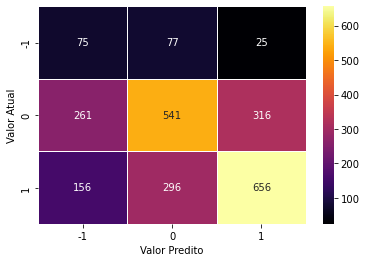

In [198]:
lstm_confusion_matrix = pd.crosstab(y_test_lstm_hp_1d, 
                                   y_pred_lstm_hp_1d, 
                                   rownames=['Valor Atual'], 
                                   colnames=['Valor Predito'])

sn.heatmap(lstm_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()